# 함수

In [5]:
def drop_cols(data):
    drop_cols = data.columns[data.columns.str.contains('qcflg|crob|yn')]
    data = data.drop(columns=drop_cols)
    data = data.drop(columns=['Unnamed: 0', 'orgn_stn_id'])
    return data

In [6]:
def sort_by(data, colname):
    data = data.sort_values(by=colname)
    data = data.reset_index()
    del data['index']
    
    return data

In [7]:
def multi_distplot(data):
    
    col_n = data.shape[1] - 2
    plt.figure(figsize=(15,20))

    for i in range(col_n):
        plt.subplot(6, 4, i+1)
        sns.distplot(data.iloc[:,i+2], kde=False)

# sea_buoy

## 데이터 확인

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
bu = pd.read_csv('../data/weather/raw/sea_buoy.csv')
bu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69245 entries, 0 to 69244
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         69245 non-null  int64  
 1   tm                 69245 non-null  object 
 2   stn_id             69245 non-null  int64  
 3   wd_n1              69175 non-null  float64
 4   wd_n1_qcflg        29074 non-null  float64
 5   wd_n1_crob         71 non-null     float64
 6   ws_n1              69171 non-null  float64
 7   ws_n1_qcflg        29076 non-null  float64
 8   ws_n1_crob         75 non-null     float64
 9   gust_ws_n1         69117 non-null  float64
 10  gust_ws_n1_qcflg   29107 non-null  float64
 11  gust_ws_n1_crob    128 non-null    float64
 12  wd_n2              69076 non-null  float64
 13  wd_n2_qcflg        29174 non-null  float64
 14  wd_n2_crob         170 non-null    float64
 15  ws_n2              69072 non-null  float64
 16  ws_n2_qcflg        291

C:\Users\B0113\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 컬럼정리

In [11]:
bu = drop_cols(bu)
bu.isnull().mean()

tm                 0.000000
stn_id             0.000000
wd_n1              0.001011
ws_n1              0.001069
gust_ws_n1         0.001849
wd_n2              0.002441
ws_n2              0.002498
gust_ws_n2         0.002816
pa                 0.008564
hm                 0.015062
ta                 0.003610
wrtm               0.001011
max_wh             0.002296
atent_wh           0.010427
avg_wh             0.044812
wvprd              0.005300
wvdr               0.001098
rqmod_rslt         0.608232
m_qc_rslt          0.974280
gust_ws_sen_cls    1.000000
wd_sen_cls         1.000000
ws_sen_cls         1.000000
dtype: float64

In [12]:
bu = bu.drop(columns=['m_qc_rslt', 'rqmod_rslt', 'gust_ws_sen_cls', 'wd_sen_cls', 'ws_sen_cls'])
bu.isnull().sum()

tm               0
stn_id           0
wd_n1           70
ws_n1           74
gust_ws_n1     128
wd_n2          169
ws_n2          173
gust_ws_n2     195
pa             593
hm            1043
ta             250
wrtm            70
max_wh         159
atent_wh       722
avg_wh        3103
wvprd          367
wvdr            76
dtype: int64

In [14]:
bu.columns

Index(['tm', 'stn_id', 'wd_n1', 'ws_n1', 'gust_ws_n1', 'wd_n2', 'ws_n2',
       'gust_ws_n2', 'pa', 'hm', 'ta', 'wrtm', 'max_wh', 'atent_wh', 'avg_wh',
       'wvprd', 'wvdr'],
      dtype='object')

In [15]:
bu.columns = ['tma', 'stn_id', 'wd_n1', 'ws_n1', 'gust_ws_n1', 'wd_n2', 'ws_n2',
       'gust_ws_n2', 'pa', 'hm', 'ta', 'wrtm', 'max_wh', 'atent_wh', 'avg_wh',
       'wvprd', 'wvdr']

## 데이터타입 정리

In [16]:
bu['tma'] = pd.to_datetime(bu['tma'])
bu.dtypes

tma           datetime64[ns]
stn_id                 int64
wd_n1                float64
ws_n1                float64
gust_ws_n1           float64
wd_n2                float64
ws_n2                float64
gust_ws_n2           float64
pa                   float64
hm                   float64
ta                   float64
wrtm                 float64
max_wh               float64
atent_wh             float64
avg_wh               float64
wvprd                float64
wvdr                 float64
dtype: object

## 정렬

In [17]:
bu = sort_by(bu, ['tma', 'stn_id'])
bu.head()

,tma,stn_id,wd_n1,ws_n1,gust_ws_n1,wd_n2,ws_n2,gust_ws_n2,pa,hm,ta,wrtm,max_wh,atent_wh,avg_wh,wvprd,wvdr
0,2016-03-31 23:30:00,22101,118.0,2.0,2.9,121.0,2.0,2.7,1015.6,42.0,9.6,5.6,0.0,0.0,0.0,4.0,304.0
1,2016-04-01 00:00:00,22101,143.0,2.0,2.6,146.0,1.0,2.3,1015.5,72.0,8.4,5.8,0.0,0.0,0.0,4.0,319.0
2,2016-04-01 00:30:00,22101,103.0,0.0,1.1,101.0,0.0,1.0,1015.3,67.0,8.8,5.6,0.0,0.0,0.0,4.0,314.0
3,2016-04-01 01:00:00,22101,72.0,0.0,0.7,64.0,0.0,0.3,1015.1,57.0,8.0,5.7,0.0,0.0,0.0,2.0,360.0
4,2016-04-01 01:30:00,22101,10.0,1.0,2.9,11.0,1.0,2.8,1015.2,44.0,8.9,5.7,0.0,0.0,0.0,4.0,308.0


In [18]:
bu = bu.iloc[1:, :]
bu.head()

,tma,stn_id,wd_n1,ws_n1,gust_ws_n1,wd_n2,ws_n2,gust_ws_n2,pa,hm,ta,wrtm,max_wh,atent_wh,avg_wh,wvprd,wvdr
1,2016-04-01 00:00:00,22101,143.0,2.0,2.6,146.0,1.0,2.3,1015.5,72.0,8.4,5.8,0.0,0.0,0.0,4.0,319.0
2,2016-04-01 00:30:00,22101,103.0,0.0,1.1,101.0,0.0,1.0,1015.3,67.0,8.8,5.6,0.0,0.0,0.0,4.0,314.0
3,2016-04-01 01:00:00,22101,72.0,0.0,0.7,64.0,0.0,0.3,1015.1,57.0,8.0,5.7,0.0,0.0,0.0,2.0,360.0
4,2016-04-01 01:30:00,22101,10.0,1.0,2.9,11.0,1.0,2.8,1015.2,44.0,8.9,5.7,0.0,0.0,0.0,4.0,308.0
5,2016-04-01 02:00:00,22101,46.0,3.0,4.6,49.0,3.0,4.7,1015.0,40.0,11.2,5.7,0.0,0.0,0.0,4.0,320.0


In [19]:
bu = bu.reset_index()
del bu['index']
bu.head()

,tma,stn_id,wd_n1,ws_n1,gust_ws_n1,wd_n2,ws_n2,gust_ws_n2,pa,hm,ta,wrtm,max_wh,atent_wh,avg_wh,wvprd,wvdr
0,2016-04-01 00:00:00,22101,143.0,2.0,2.6,146.0,1.0,2.3,1015.5,72.0,8.4,5.8,0.0,0.0,0.0,4.0,319.0
1,2016-04-01 00:30:00,22101,103.0,0.0,1.1,101.0,0.0,1.0,1015.3,67.0,8.8,5.6,0.0,0.0,0.0,4.0,314.0
2,2016-04-01 01:00:00,22101,72.0,0.0,0.7,64.0,0.0,0.3,1015.1,57.0,8.0,5.7,0.0,0.0,0.0,2.0,360.0
3,2016-04-01 01:30:00,22101,10.0,1.0,2.9,11.0,1.0,2.8,1015.2,44.0,8.9,5.7,0.0,0.0,0.0,4.0,308.0
4,2016-04-01 02:00:00,22101,46.0,3.0,4.6,49.0,3.0,4.7,1015.0,40.0,11.2,5.7,0.0,0.0,0.0,4.0,320.0


## 결측치 & 이상치 처리

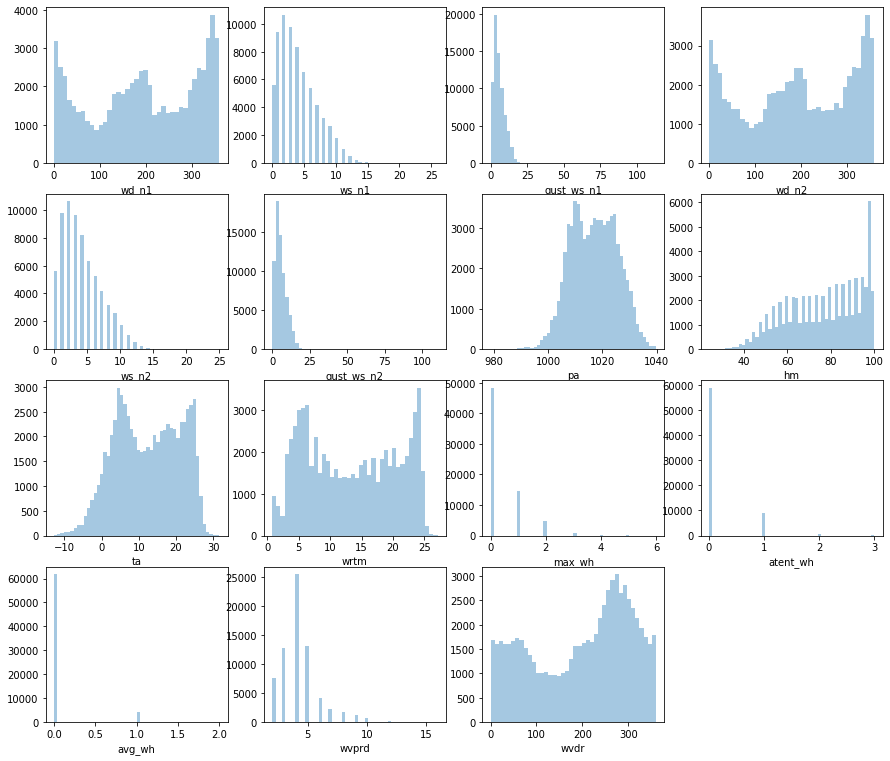

In [20]:
multi_distplot(bu)

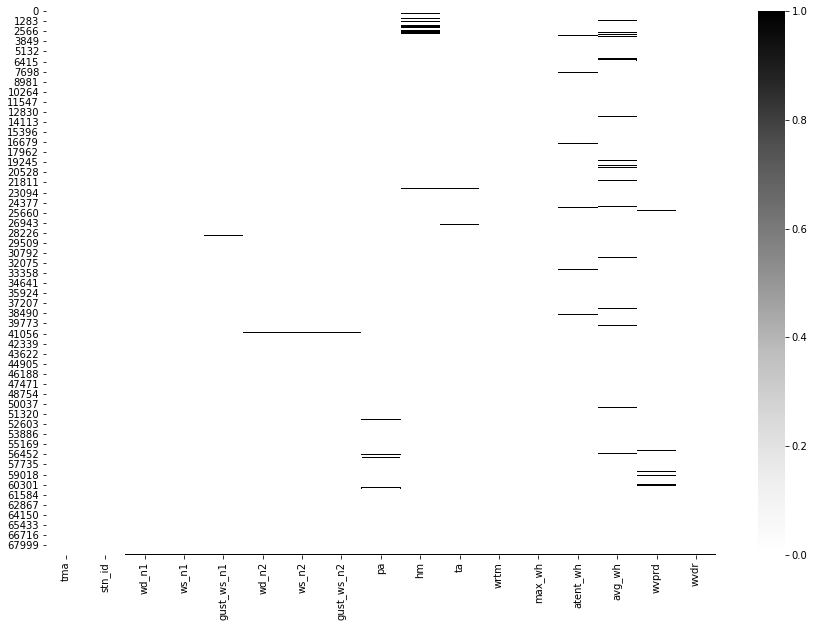

In [22]:
plt.figure(figsize=(15, 10))

sns.heatmap(bu.isnull(), cmap='Greys')

In [23]:
bu = bu.fillna(method='ffill')
bu.isnull().sum()

tma           0
stn_id        0
wd_n1         0
ws_n1         0
gust_ws_n1    0
wd_n2         0
ws_n2         0
gust_ws_n2    0
pa            0
hm            0
ta            0
wrtm          0
max_wh        0
atent_wh      0
avg_wh        0
wvprd         0
wvdr          0
dtype: int64

In [24]:
bu.to_csv('../data/weather/sea_buoy.csv', encoding='utf-8', index=False)

# sea_